In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
desp_edu = pd.read_csv('C:/Users/emers/Documents/Cursos/Ironhack/week-2/Projeto/Data set`s/brazil-gov-expenses/Brazil_Gov_Exp_All - Formated.csv',
                   sep=';',encoding='ISO-8859-1')

In [3]:
desp_edu.head()

,Year,Gov_agency_Cod,Sup_Gov_agency_Cod,Planned,Released,Gov_agency_Name,Sup_Gov_agency_Name,Paid_out
0,2014,20101,20000,"1.207.732.252,04","1.080.446.271,42",Presidencia da Republica,Presidencia da Republica,"1.073.206.586,35"
1,2014,20116,20000,"188.922.008,78","177.563.751,32",Fundo de Imprensa Nacional,Presidencia da Republica,"177.558.779,52"
2,2014,20122,81000,"87.360.033,22","30.141.173,42",Secretaria Nacional de Politicas para Mulheres,"Ministerio da Mulher, Familia e Direitos Humanos","30.127.407,52"
3,2014,20129,22000,"1.427.440.589,25","1.024.935.703,88",Secretaria Especial de Agricultura Familiar e ...,"Ministerio da Agricultura, Pecuaria e Abasteci...","1.022.675.533,51"
4,2014,20202,25000,"42.617.886,50","39.935.056,75",Fundacao Escola Nacional de Administracao Publica,Ministerio da Economia,"39.935.056,75"


In [4]:
desp_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 8 columns):
Year                   1085 non-null int64
Gov_agency_Cod         1085 non-null int64
Sup_Gov_agency_Cod     1085 non-null int64
Planned                1085 non-null object
Released               1085 non-null object
Gov_agency_Name        1085 non-null object
Sup_Gov_agency_Name    1085 non-null object
Paid_out               1085 non-null object
dtypes: int64(3), object(5)
memory usage: 67.9+ KB


In [5]:
desp_edu.columns = [name.lower() for name in desp_edu.columns]

desp_edu.columns

Index(['year', 'gov_agency_cod', 'sup_gov_agency_cod', 'planned', 'released',
       'gov_agency_name', 'sup_gov_agency_name', 'paid_out'],
      dtype='object')

In [6]:
for col in desp_edu.columns: 
    print(col)

year
gov_agency_cod
sup_gov_agency_cod
planned
released
gov_agency_name
sup_gov_agency_name
paid_out


In [7]:
desp_edu["paid_out_clean"] = pd.to_numeric(desp_edu["paid_out"].apply(lambda x: x.replace(".","").replace(",",".")))

desp_edu.head()

,year,gov_agency_cod,sup_gov_agency_cod,planned,released,gov_agency_name,sup_gov_agency_name,paid_out,paid_out_clean
0,2014,20101,20000,"1.207.732.252,04","1.080.446.271,42",Presidencia da Republica,Presidencia da Republica,"1.073.206.586,35",1.073207e+09
1,2014,20116,20000,"188.922.008,78","177.563.751,32",Fundo de Imprensa Nacional,Presidencia da Republica,"177.558.779,52",1.775588e+08
2,2014,20122,81000,"87.360.033,22","30.141.173,42",Secretaria Nacional de Politicas para Mulheres,"Ministerio da Mulher, Familia e Direitos Humanos","30.127.407,52",3.012741e+07
3,2014,20129,22000,"1.427.440.589,25","1.024.935.703,88",Secretaria Especial de Agricultura Familiar e ...,"Ministerio da Agricultura, Pecuaria e Abasteci...","1.022.675.533,51",1.022676e+09
4,2014,20202,25000,"42.617.886,50","39.935.056,75",Fundacao Escola Nacional de Administracao Publica,Ministerio da Economia,"39.935.056,75",3.993506e+07


In [8]:
gastos_total = desp_edu[["year","paid_out_clean"]].groupby(["year"]).sum()
gastos_total.columns = ['Total de Gastos']
gastos_total

,Total de Gastos
year,
2014,2.097077e+12
2015,2.177241e+12
2016,2.469834e+12
2017,2.373248e+12
2018,2.501132e+12


In [9]:
desp_edu.loc[(desp_edu['sup_gov_agency_name']=="Ministerio da Educacao") & 
             desp_edu["gov_agency_name"].str.contains("Universidade")][["year","gov_agency_name","paid_out_clean"]]

desp_uf= desp_edu.loc[(desp_edu['sup_gov_agency_name']=="Ministerio da Educacao") & 
             desp_edu["gov_agency_name"].str.contains("Universidade")][["year","gov_agency_name","paid_out_clean"]]

In [10]:
gastos_uf = desp_uf[["year","paid_out_clean"]].groupby(["year"]).sum()
gastos_uf.columns = ['Gastos com Federais']
gastos_uf

,Gastos com Federais
year,
2014,4.085268e+10
2015,4.329063e+10
2016,4.711092e+10
2017,5.158223e+10
2018,5.011651e+10


In [11]:
gastos_edu = desp_edu[["year", "sup_gov_agency_name", "paid_out_clean"]].groupby(["year","sup_gov_agency_name"]).sum().unstack()["paid_out_clean"][['Ministerio da Educacao']]
gastos_edu

sup_gov_agency_name,Ministerio da Educacao
year,
2014,9.659026e+10
2015,1.032665e+11
2016,1.095093e+11
2017,1.168747e+11
2018,1.107682e+11


In [12]:
tabela_gastos = gastos_edu.join(gastos_uf).join(gastos_total)
tabela_gastos['Percentual Federais'] = round(tabela_gastos['Gastos com Federais']/tabela_gastos['Total de Gastos']*100,1)

tabela_gastos['Percentual Educacao'] = round(tabela_gastos['Ministerio da Educacao']/tabela_gastos['Total de Gastos']*100, 1)
tabela_gastos


,Ministerio da Educacao,Gastos com Federais,Total de Gastos,Percentual Federais,Percentual Educacao
year,,,,,
2014,9.659026e+10,4.085268e+10,2.097077e+12,1.9,4.6
2015,1.032665e+11,4.329063e+10,2.177241e+12,2.0,4.7
2016,1.095093e+11,4.711092e+10,2.469834e+12,1.9,4.4
2017,1.168747e+11,5.158223e+10,2.373248e+12,2.2,4.9
2018,1.107682e+11,5.011651e+10,2.501132e+12,2.0,4.4


Text(0.5, 1.0, 'Gastos Federais X Investimento em Educação')

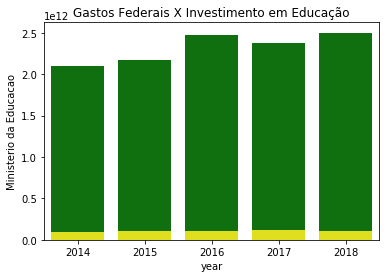

In [13]:
sns.barplot(x=tabela_gastos.index, y=tabela_gastos['Total de Gastos'], color='green')
sns.barplot(x=tabela_gastos.index, y=tabela_gastos['Ministerio da Educacao'], color='yellow')


plt.title("Gastos Federais X Investimento em Educação")

In [14]:
tabela_gastos_2 = gastos_edu.join(gastos_uf)
tabela_gastos_2['Percentual Federais'] = round(tabela_gastos['Gastos com Federais']/tabela_gastos["Ministerio da Educacao"]*100,1)

tabela_gastos_2


,Ministerio da Educacao,Gastos com Federais,Percentual Federais
year,,,
2014,9.659026e+10,4.085268e+10,42.3
2015,1.032665e+11,4.329063e+10,41.9
2016,1.095093e+11,4.711092e+10,43.0
2017,1.168747e+11,5.158223e+10,44.1
2018,1.107682e+11,5.011651e+10,45.2


Text(0.5, 1.0, 'Gastos com Educação X Gastos com UFs')

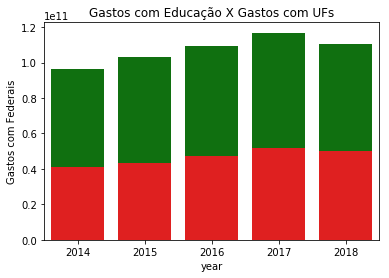

In [15]:
sns.barplot(x=tabela_gastos_2.index, y=tabela_gastos_2['Ministerio da Educacao'], color='green')
sns.barplot(x=tabela_gastos_2.index, y=tabela_gastos_2['Gastos com Federais'], color='red')
plt.title("Gastos com Educação X Gastos com UFs")